In [2]:
import pandas as pd
import numpy as np

# Visualization
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate linearity of relationships between variables
# and variable distributions
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import shapiro, kstest, poisson, chisquare, ttest_ind, levene, bartlett, sem

# Null value imputation using advanced statistical methods
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Configuration
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Managing warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Phase 1: Data Exploration and Cleaning

In [3]:
df_activity =pd.read_csv('../files/Customer Flight Activity.csv')
df_history = pd.read_csv('../files/Customer Loyalty History.csv')

_______________________________________________________

**1.1_comenzamos con Customer Flight Activity**

In [4]:
df_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
#conozcamos las dimensiones de la tabla
print(f'nº filas:{df_activity.shape[0]}')
print(f'nº columnas:{df_activity.shape[1]}')

nº filas:405624
nº columnas:10


In [6]:
#info datos para conocer su tipo, el número de no nulos y la cantidad de datos que estamos manejando.
#los resultados nos invitan a descartar la comprobación de nulos.
df_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [7]:
#recuperamos los datos estadísticos de las columnas numéricas de 'df_flight' -en este caso, todas-
df_activity.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [8]:
#observamos los valores únicos de cada columna iterando por cada una de ellas con un bucle for:
for col in df_activity:
    print(f'Estos son los valores únicos de la columna {col.upper()}')
    print(df_activity[col].unique())
    print('\n ------------------------------ \n')

Estos son los valores únicos de la columna LOYALTY NUMBER
[100018 100102 100140 ... 999731 999788 999891]

 ------------------------------ 

Estos son los valores únicos de la columna YEAR
[2017 2018]

 ------------------------------ 

Estos son los valores únicos de la columna MONTH
[ 1  9  2  3 11  4  5  7  6  8 10 12]

 ------------------------------ 

Estos son los valores únicos de la columna FLIGHTS BOOKED
[ 3 10  6  0  8 11  9  4  7  5  2  1 12 13 14 16 15 17 18 19 20 21]

 ------------------------------ 

Estos son los valores únicos de la columna FLIGHTS WITH COMPANIONS
[ 0  4  7  1  6  3  5  2 10  8  9 11]

 ------------------------------ 

Estos son los valores únicos de la columna TOTAL FLIGHTS
[ 3 14  6  0 15 11 12 10  8  9  7  5 16  2  1 17 13 22  4 19 18 21 26 20
 23 25 27 24 28 30 29 31 32]

 ------------------------------ 

Estos son los valores únicos de la columna DISTANCE
[1521 2030 1200 ... 1217  617 4135]

 ------------------------------ 

Estos son los valores ún

In [9]:
#comprobación de filas duplicadas
df_activity.duplicated().sum()

1864

In [10]:
#al tener un número de filas duplicadas tan elevado, comprobamos 
#cuál es el número de datos duplicados en la columna identitaria 
df_activity['Loyalty Number'].duplicated().sum()

388887

In [11]:
#comprobamos cuáles son los casos en los que los valores en 'loyalty number' se repite
df_activity[df_activity['Loyalty Number'].duplicated().sort_values()]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
37,100504,2017,2,0,0,0,0,0.0,0,0
39,100504,2017,3,0,0,0,0,0.0,0,0
42,101902,2017,1,0,0,0,0,0.0,0,0
88,100504,2017,4,0,0,0,0,0.0,0,0
101,100504,2017,5,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


_______________________________________________________

**1.2_comenzamos con Customer Loyalty History**

In [12]:
df_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [13]:
#conozcamos las dimensiones de la tabla
print(f'nº filas:{df_history.shape[0]}')
print(f'nº columnas:{df_history.shape[1]}')

nº filas:16737
nº columnas:16


In [14]:
#comprobación de datos duplicados
df_history.duplicated().sum()

0

In [15]:
#información sobre los datos: comprobamos en este caso la gran cantidad de nulos, por lo que procedemos a inspeccionarlos más detenidamente
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [16]:
#observamos los valores únicos de cada columna iterando por cada una de ellas con un bucle for:
for col in df_history:
    print(f'Estos son los valores únicos de la columna {col.upper()}')
    print(df_history[col].unique())
    print('\n ------------------------------ \n')

Estos son los valores únicos de la columna LOYALTY NUMBER
[480934 549612 429460 ... 776187 906428 652627]

 ------------------------------ 

Estos son los valores únicos de la columna COUNTRY
['Canada']

 ------------------------------ 

Estos son los valores únicos de la columna PROVINCE
['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']

 ------------------------------ 

Estos son los valores únicos de la columna CITY
['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Fredericton' 'Ottawa' 'Tremblant' 'Calgary'
 'Thunder Bay' 'Whistler' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Regina' 'Kelowna' "St. John's"
 'Victoria' 'Kingston' 'Banff' 'Moncton' 'Charlottetown']

 ------------------------------ 

Estos son los valores únicos de la columna POSTAL CODE
['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y

In [17]:
df_history.isnull().sum()
#el primer vistazo nos destaca tres columnas con varios miles de datos nulos.
#entendemos por la documentación que las columnas de 'Cancellation Year' y 'Cancellation Month' 
#solo estarán rellenas cuando el cliente haya cancelado su suscripción

Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                 4238
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [18]:
#sacamos los datos estadísticos de todas las columnas numéricas 
df_history.describe().T

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


In [19]:
#prestamos más atención a la columna 'Salary'
df_history['Salary'].unique()

array([ 83236.,     nan, 103495., ...,  76178.,  91970., -57297.])

In [20]:
#según la documentación, 'Salary' es un dato que completa la compañía con una estimación del salario de sus suscritores
#procesos que realizaremos en esta columna: corrección de negativos, completaremos los nulos con la media.
df_history['Salary'].describe().T.reset_index().round()

,index,Salary
0,count,12499.0
1,mean,79246.0
2,std,35008.0
3,min,-58486.0
4,25%,59246.0
5,50%,73455.0
6,75%,88518.0
7,max,407228.0


In [21]:
#recogemos la suma de todos los negativos para conocer la magnitud de la situación 
print(f'El porcentaje de resultados negativos es: {(df_history['Salary'] < 0).sum()*100 / df_history.shape[0]}%')

El porcentaje de resultados negativos es: 0.11949572802772301%


In [22]:
#estudiamos los resultados negativos en relación con toda la tabla 
df_history[df_history['Salary'] < 0].head(1) #aplicamos head para limitar el print después de realizar la consulta 

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.5,2018 Promotion,2018,3,NaN,NaN


In [23]:
#conclusiones: 
# el porcentaje de resultados negativos es tan bajo que determinamos su inclusión como un error de tipografía
# procederemos a resolver los nulos de la forma más adecuada en la fase de limpieza

In [24]:
#y ahora comprobamos las características del conjuto de datos categóricos
df_history.describe(include='object').T

,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766


_______________________________________________________

**1.4_tareas de limpieza**

In [25]:
#corregimos los valores negativos de la columna 'Salary'
df_history['Salary'] = df_history['Salary'].apply(lambda x: -x if x < 0 else x)
df_history['Salary'].describe().T.round(2)

count     12499.00
mean      79359.34
std       34749.69
min        9081.00
25%       59246.50
50%       73455.00
75%       88517.50
max      407228.00
Name: Salary, dtype: float64

<Axes: xlabel='Salary'>

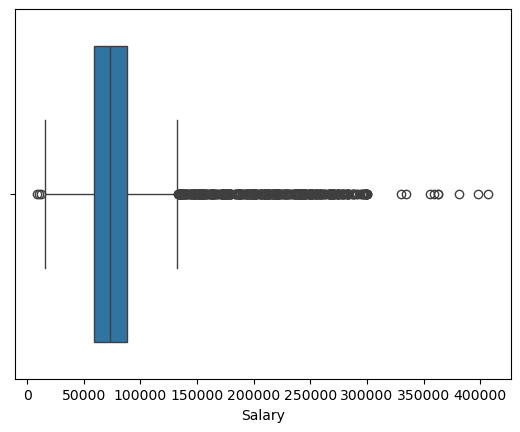

In [26]:
#antes de imputar los valores nulos, comprobamos por medio de una visualización si nuestra columna tiene valores atípico
sns.boxplot(x = 'Salary', data = df_history)
#la cantidad de valores atípicos es muy elevada, optamos por aplicar 

In [27]:
#empezamos la prueba con KNNImputer, para ello crearemos primero una copia de nuestro df
df_history_c = df_history.copy()
#empezamos detallando los parámetros de KNN
imp_knn = KNNImputer(n_neighbors=20)
imp_knn_d = imp_knn.fit_transform(df_history_c[['Salary']])
df_history_c['Salary'] = imp_knn_d
df_history_c['Salary'].describe().T.reset_index().round()

,index,Salary
0,count,16737.0
1,mean,79359.0
2,std,30029.0
3,min,9081.0
4,25%,63899.0
5,50%,79359.0
6,75%,82940.0
7,max,407228.0


In [ ]:
#comprobamos que la imputación ha funcionado 
df_history_c['Salary'].isnull().sum()

0

_______________________________________________________

**1.5_tareas de filtrado**

In [ ]:
#agrupación de las columnas que necesitamos para el posterior estudio de los datos
df_ag = df_activity.groupby(['Loyalty Number'])['Flights Booked'].sum().reset_index()

_______________________________________________________

**1.6_fusión de tablas**

In [32]:
#el método de unión sera 'left merge' a través de la columna 'Loyalty Number' y utilizando la versión de los df's corregida/filtrada
df_study = df_ag.merge(right=df_history_c, how='left',left_on='Loyalty Number', right_on='Loyalty Number')
df_study.head()

,Loyalty Number,Flights Booked,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,157,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.000000,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,173,Canada,Ontario,Toronto,M1R 4K3,Male,College,79359.340907,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,152,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,79359.340907,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,79,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.000000,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,127,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.000000,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [ ]:
#comprobación de duplicados del nuevo df
df_study.duplicated().sum()

0

In [ ]:
#comprobación de nulos del nuevo df
df_study.isnull().sum()

Loyalty Number            0
Flights Booked            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Salary                    0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
Cancellation Year     14670
Cancellation Month    14670
dtype: int64

In [ ]:
#desarrollo de la función para conventir datos float en int 
def float_to_int(df, col):
    """
    Convierte una columna de tipo float a int, manteniendo los valores nulos como NaN.
    """
    return df[col].apply(lambda x: int(x) if pd.notna(x) else np.nan)

columnas = ['Cancellation Month', 'Cancellation Year']

In [ ]:
#itaramos sobre las columnas para aplicar la función
for dato in columnas:
    df_study[dato] = float_to_int(df_study, dato)  #se aplica la función a la columna actual
    df_study[dato] = df_study[dato].astype('Int64')  #convierte los datos a tipo 'Int64' para mantener NaN

#imprimimos la información de los nuevos datos
df_study[columnas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Cancellation Month  2067 non-null   Int64
 1   Cancellation Year   2067 non-null   Int64
dtypes: Int64(2)
memory usage: 294.3 KB


In [ ]:
#iteramos por todos los valores del nuevo df para conocer sus valores únicos
for col in df_study[columnas]:
    print(f'Estos son los valores únicos de la columna {col.upper()}')
    print(df_study[col].unique())
    print('\n ------------------------------ \n')

Estos son los valores únicos de la columna CANCELLATION MONTH
<IntegerArray>
[<NA>, 3, 8, 6, 9, 2, 7, 10, 1, 4, 12, 11, 5]
Length: 13, dtype: Int64

 ------------------------------ 

Estos son los valores únicos de la columna CANCELLATION YEAR
<IntegerArray>
[<NA>, 2018, 2015, 2016, 2014, 2017, 2013]
Length: 7, dtype: Int64

 ------------------------------ 



# fase 2. visualización

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [ ]:
#me rindo aquí (por ahora)

# fase 3. estadísticas

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias
significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los
pasos que deberas seguir son:
1. Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes:
'Flights Booked' y 'Education'.
2. Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas
básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada
grupo.
3. Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia
significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
#preparamos los datos para contar únicamente con las columnas con las que queremos trabajar
df_ed = df_study.groupby(['Education'])['Flights Booked'].sum().reset_index()

,Education,Flights Booked
0,Bachelor,1038123
1,College,426398
2,Doctor,74036
3,High School or Below,78993
4,Master,51614


In [ ]:
#agrupamos los datos para conocer las estadísticas descriptivas de cada valor de su columna 'Education'
df_agg = df_study.groupby(['Education'])['Flights Booked'].agg(["mean", "median", "std", "var", "min", "max"]).round()
df_agg

,mean,median,std,var,min,max
Education,,,,,,
Bachelor,99.0,113.0,54.0,2941.0,0,354
College,101.0,113.0,54.0,2939.0,0,324
Doctor,101.0,115.0,56.0,3129.0,0,292
High School or Below,101.0,115.0,55.0,3010.0,0,265
Master,102.0,113.0,54.0,2919.0,0,322


Text(0, 0.5, 'Vuelos Reservados')

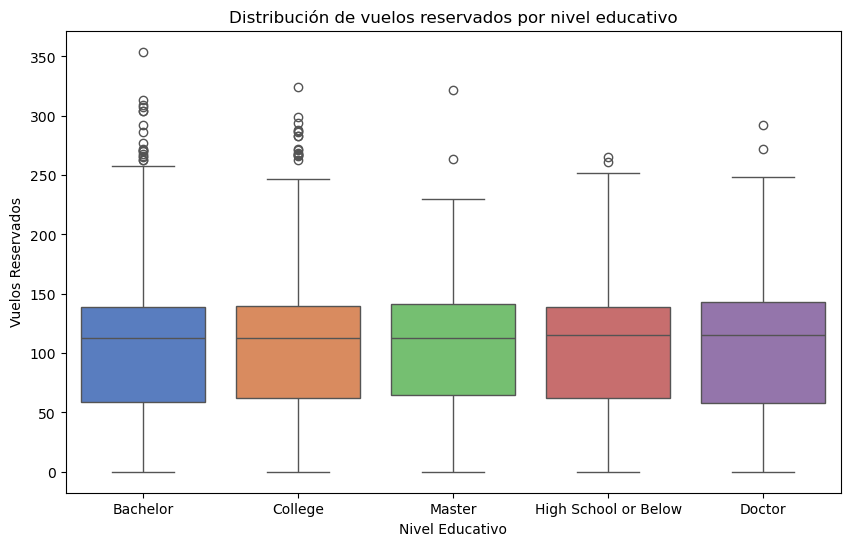

In [ ]:
#visualizamos sus resultados en un boxplot para tener una imagen conjunta de sus valores descriptivos y conocer la magnitud de sus valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Flights Booked', data=df_study, palette='muted')
plt.title('Distribución de vuelos reservados por nivel educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Vuelos Reservados')

In [ ]:
#agrupamos por media para comenzar nuestro análisis de hipóteiss
df_study = df_study.groupby(['Education'])['Flights Booked'].mean().reset_index()

<Axes: xlabel='Flights Booked', ylabel='Count'>

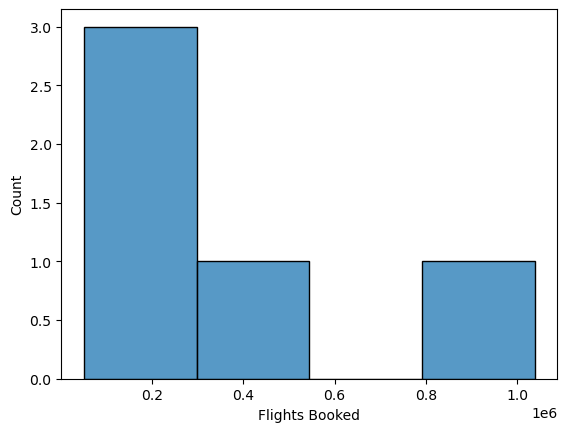

In [84]:
#visualizamos los datos en una gráfica
sns.histplot(x = 'Flights Booked', data = df_ed)

In [ ]:
#para trabajar con estos datos, necesitamos una agrupación más por niveles educativos, así que dividimos los datos para poder agruparlos
def agrupacion(nivel):
    if nivel == 'High School or Below':
        return 'Basic Education'
    else:
        return 'Superior Education'

In [ ]:
#aplicamos la función 'agrupación'
df_study['Education Group'] = df_study['Education'].apply(agrupacion)

In [ ]:
#agrupamos los datos con la nueva división
df_eg = df_study.groupby('Education Group')['Flights Booked'].mean().reset_index()
df_eg.count()

Education Group    2
Flights Booked     2
dtype: int64

<Axes: xlabel='Flights Booked', ylabel='Count'>

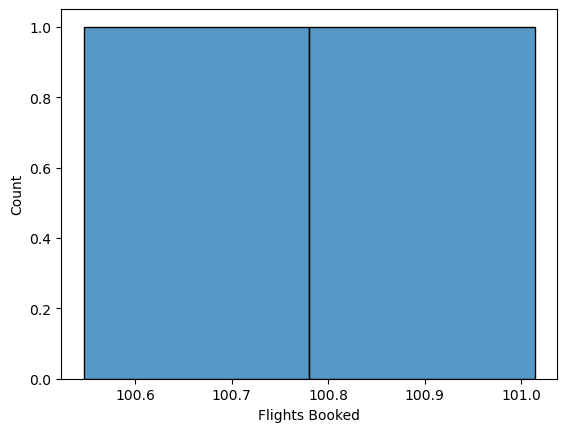

In [ ]:
#vemos gráficamente qué cambios han surgido 
sns.histplot(x = 'Flights Booked', data = df_eg )

In [122]:
#hacemos una comprobación en crosstable para crear nuetra tabla de contigencia
tabla_contingencia = pd.crosstab(df_eg['Education Group'], df_eg['Flights Booked'])

In [123]:
#realiazamos la prueba para conocer el tipo de diferencia 
_, p_value, _, _ = stats.chi2_contingency(tabla_contingencia)
p_value

1.0

In [125]:
#definimos las hipótesis:
h0 = p_value < 0.05 
h1 = p_value > 0.05

In [ ]:
#desarrollamos una sentencia de control para imprimir los resultados de este y futuros estudios 
if h0 is True:
    print('NO existe una diferencia significativa entre niveles educativos y la reserva de vuelos NO es significativa')
else:
    print('Existe una diferencia significativa entre niveles educativos y la reserva de vuelos')

Existe una diferencia significativa entre niveles educativos y la reserva de vuelos
